# Heart_Disease_Project_Switzerland
### By: Daniel Wetta and David Griekspoor

In [1]:
## Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# read the heart disease data for Switzerland into a DataFrame
path = '../Heart Disease Processed Data/processed.switzerland.data.csv'

#To get rid of warnings or hide any Panda Warnings
pd.options.mode.chained_assignment=None
#To read file path
HD = pd.read_csv(path)

In [2]:
# print the head of the dataframe
HD.head()

,32,1,1.1,95,0,?,0.1,127,0.2,.7,1.2,?.1,?.2,1.3
0,34,1,4,115,0,?,?,154,0,.2,1,?,?,1
1,35,1,4,?,0,?,0,130,1,?,?,?,7,3
2,36,1,4,110,0,?,0,125,1,1,2,?,6,1
3,38,0,4,105,0,?,0,166,0,2.8,1,?,?,2
4,38,0,4,110,0,0,0,156,0,0,2,?,3,1


In [3]:
HD = pd.read_csv('../Heart Disease Processed Data/processed.switzerland.data.csv', header=0, names=HD.columns)

In [4]:
HD.columns=['Age','Sex','CP','Trestbps','Chol','FBS','Restecg','Thalach','Exang','Oldpeak','Slope','CA','Thal','Target']

In [5]:
# Replace '?' with NAN
HD.replace('?', np.nan, inplace=True)     

In [6]:
# print out the percentage of missing values in the each column
HD_missing= HD.isna()
HD_missing.head()

,Age,Sex,CP,Trestbps,Chol,FBS,Restecg,Thalach,Exang,Oldpeak,Slope,CA,Thal,Target
0,False,False,False,False,False,True,True,False,False,False,False,True,True,False
1,False,False,False,True,False,True,False,False,False,True,True,True,False,False
2,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,False,False,False,False,False,True,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [7]:
HD.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps      2
Chol          0
FBS          74
Restecg       1
Thalach       1
Exang         1
Oldpeak       6
Slope        17
CA          117
Thal         51
Target        0
dtype: int64

In [8]:
# Examine if there are any duplicate observations in the dataset
HD.duplicated().sum()

0

In [9]:
HD.Chol.value_counts()

0    122
Name: Chol, dtype: int64

In [10]:
HD.CA.value_counts()

2    3
1    2
Name: CA, dtype: int64

In [11]:
HD.Thal.value_counts()

7    42
3    19
6    10
Name: Thal, dtype: int64

In [12]:
HD.FBS.value_counts()

0    43
1     5
Name: FBS, dtype: int64

In [13]:
HD.Restecg.value_counts()

0    84
1    30
2     7
Name: Restecg, dtype: int64

In [14]:
HD.Exang.value_counts()

0    67
1    54
Name: Exang, dtype: int64

In [15]:
HD.Slope.value_counts()

2    61
1    32
3    12
Name: Slope, dtype: int64

In [16]:
HD.Target.value_counts()

1    47
2    32
3    30
0     8
4     5
Name: Target, dtype: int64

In [17]:
# removing columns
HD.drop(['Chol','FBS','CA','Thal'], axis=1, inplace=True)                               # axis=0 for rows, 1 for columns

In [18]:
# Drop all null values
HD.dropna(axis=0, inplace=True)        # make it permanent

In [19]:
HD['Sex'][HD['Sex'] == 0] = 'Female'
HD['Sex'][HD['Sex'] == 1] = 'Male'

 

HD['CP'][HD['CP'] == 1] = 'typical angina'
HD['CP'][HD['CP'] == 2] = 'atypical angina'
HD['CP'][HD['CP'] == 3] = 'non-anginal pain'
HD['CP'][HD['CP'] == 4] = 'asymptomatic'

 
HD['Restecg'][HD['Restecg'] == '0'] = 'normal'
HD['Restecg'][HD['Restecg'] == '1'] = 'ST-T wave abnormality'
HD['Restecg'][HD['Restecg'] == '2'] = 'left ventricular hypertrophy'

 

HD['Exang'][HD['Exang'] == '0'] = 'No'
HD['Exang'][HD['Exang'] == '1'] = 'Yes'

 

HD['Slope'][HD['Slope'] == '1'] = 'upsloping'
HD['Slope'][HD['Slope'] == '2'] = 'flat'
HD['Slope'][HD['Slope'] == '3'] = 'downsloping'


HD['Target'][HD['Target'] == 0] = 'No'
HD['Target'][HD['Target'] == 1] = 'No'
HD['Target'][HD['Target'] == 2] = 'Yes'
HD['Target'][HD['Target'] == 3] = 'Yes'
HD['Target'][HD['Target'] == 4] = 'Yes'

In [20]:
HD.dtypes

Age          int64
Sex         object
CP          object
Trestbps    object
Restecg     object
Thalach     object
Exang       object
Oldpeak     object
Slope       object
Target      object
dtype: object

In [21]:
HD.head()

,Age,Sex,CP,Trestbps,Restecg,Thalach,Exang,Oldpeak,Slope,Target
2,36,Male,asymptomatic,110,normal,125,Yes,1,flat,No
3,38,Female,asymptomatic,105,normal,166,No,2.8,upsloping,Yes
4,38,Female,asymptomatic,110,normal,156,No,0,flat,No
5,38,Male,non-anginal pain,100,normal,179,No,-1.1,upsloping,No
6,38,Male,non-anginal pain,115,normal,128,Yes,0,flat,No


In [22]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2 to 121
Data columns (total 10 columns):
Age         104 non-null int64
Sex         104 non-null object
CP          104 non-null object
Trestbps    104 non-null object
Restecg     104 non-null object
Thalach     104 non-null object
Exang       104 non-null object
Oldpeak     104 non-null object
Slope       104 non-null object
Target      104 non-null object
dtypes: int64(1), object(9)
memory usage: 8.9+ KB


In [23]:
HD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2 to 121
Data columns (total 10 columns):
Age         104 non-null int64
Sex         104 non-null object
CP          104 non-null object
Trestbps    104 non-null object
Restecg     104 non-null object
Thalach     104 non-null object
Exang       104 non-null object
Oldpeak     104 non-null object
Slope       104 non-null object
Target      104 non-null object
dtypes: int64(1), object(9)
memory usage: 8.9+ KB


In [24]:
HD.head(20)

,Age,Sex,CP,Trestbps,Restecg,Thalach,Exang,Oldpeak,Slope,Target
2,36,Male,asymptomatic,110,normal,125,Yes,1,flat,No
3,38,Female,asymptomatic,105,normal,166,No,2.8,upsloping,Yes
4,38,Female,asymptomatic,110,normal,156,No,0,flat,No
5,38,Male,non-anginal pain,100,normal,179,No,-1.1,upsloping,No
6,38,Male,non-anginal pain,115,normal,128,Yes,0,flat,No
9,40,Male,asymptomatic,95,ST-T wave abnormality,144,No,0,upsloping,Yes
10,41,Male,asymptomatic,125,normal,176,No,1.6,upsloping,Yes
11,42,Male,asymptomatic,105,normal,128,Yes,-1.5,downsloping,No
12,42,Male,asymptomatic,145,normal,99,Yes,0,flat,Yes
13,43,Male,asymptomatic,100,normal,122,No,1.5,downsloping,Yes


In [25]:
HD['Trestbps']=HD['Trestbps'].astype('int64')
HD['Thalach']=HD['Thalach'].astype('int64')
HD['Oldpeak']=HD['Oldpeak'].astype('float64')

In [26]:
HD_new = pd.DataFrame

In [27]:
HD_new = pd.get_dummies(HD['CP'], prefix='CP')

In [28]:
HD_new=HD_new.join(HD['Age'])

In [29]:
LE = LabelEncoder()

HD_new['Sex'] = LE.fit_transform(HD['Sex']) #In order to classify two outcomes intoone columns, ex: Male and Female

In [30]:
HD_new.head()

,CP_asymptomatic,CP_atypical angina,CP_non-anginal pain,CP_typical angina,Age,Sex
2,1,0,0,0,36,1
3,1,0,0,0,38,0
4,1,0,0,0,38,0
5,0,0,1,0,38,1
6,0,0,1,0,38,1


In [31]:
HD_new=HD_new.join(HD['Trestbps'])

In [32]:
HD_new=HD_new.join(pd.get_dummies(HD['Restecg'], prefix='Restecg')) #Add as a dummy

In [33]:
HD_new=HD_new.join(HD['Thalach'])

In [34]:
LE = LabelEncoder()

HD_new['Exang'] = LE.fit_transform(HD['Exang'])

In [35]:
HD_new=HD_new.join(HD['Oldpeak'])

In [36]:
HD_new=HD_new.join(pd.get_dummies(HD['Slope'], prefix='Slope'))

In [37]:
LE = LabelEncoder()

HD_new['Target'] = LE.fit_transform(HD['Target'])

In [38]:
HD_new.head()

,CP_asymptomatic,CP_atypical angina,CP_non-anginal pain,CP_typical angina,Age,Sex,Trestbps,Restecg_ST-T wave abnormality,Restecg_left ventricular hypertrophy,Restecg_normal,Thalach,Exang,Oldpeak,Slope_downsloping,Slope_flat,Slope_upsloping,Target
2,1,0,0,0,36,1,110,0,0,1,125,1,1.0,0,1,0,0
3,1,0,0,0,38,0,105,0,0,1,166,0,2.8,0,0,1,1
4,1,0,0,0,38,0,110,0,0,1,156,0,0.0,0,1,0,0
5,0,0,1,0,38,1,100,0,0,1,179,0,-1.1,0,0,1,0
6,0,0,1,0,38,1,115,0,0,1,128,1,0.0,0,1,0,0


In [39]:
HD_new.describe()

,CP_asymptomatic,CP_atypical angina,CP_non-anginal pain,CP_typical angina,Age,Sex,Trestbps,Restecg_ST-T wave abnormality,Restecg_left ventricular hypertrophy,Restecg_normal,Thalach,Exang,Oldpeak,Slope_downsloping,Slope_flat,Slope_upsloping,Target
count,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000,104.000000
mean,0.807692,0.038462,0.134615,0.019231,55.884615,0.932692,128.701923,0.230769,0.057692,0.711538,122.701923,0.451923,0.726923,0.115385,0.586538,0.298077,0.548077
std,0.396022,0.193239,0.342965,0.138000,8.353021,0.251767,21.304487,0.423365,0.234290,0.455241,25.608281,0.500093,1.096794,0.321033,0.494839,0.459629,0.500093
min,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,80.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,51.000000,1.000000,115.000000,0.000000,0.000000,0.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,56.000000,1.000000,125.000000,0.000000,0.000000,1.000000,121.500000,0.000000,0.500000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,61.250000,1.000000,141.250000,0.000000,0.000000,1.000000,140.250000,1.000000,1.500000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,74.000000,1.000000,200.000000,1.000000,1.000000,1.000000,182.000000,1.000000,3.700000,1.000000,1.000000,1.000000,1.000000


In [40]:
HD_new.CP_asymptomatic.value_counts()

1    84
0    20
Name: CP_asymptomatic, dtype: int64

In [41]:
HD_new.Age.value_counts()

56    8
61    8
53    7
62    6
51    6
60    6
57    5
63    5
38    4
55    4
59    4
43    3
50    3
52    3
54    3
47    3
64    3
42    2
58    2
46    2
70    2
68    2
65    2
40    1
45    1
41    1
74    1
48    1
73    1
66    1
67    1
69    1
72    1
36    1
Name: Age, dtype: int64

In [42]:
HD_new.Sex.value_counts()

1    97
0     7
Name: Sex, dtype: int64

In [43]:
HD_new.Trestbps.value_counts()

120    13
115    13
130     9
140     8
160     8
125     8
110     8
150     6
105     5
145     5
135     5
95      4
100     4
155     3
80      1
200     1
180     1
165     1
185     1
Name: Trestbps, dtype: int64

In [44]:
HD_new.Oldpeak.value_counts()

 0.0    31
 2.0    11
 1.0    10
 1.5     6
 0.5     5
 0.7     3
 1.8     2
-1.0     2
 2.5     2
 0.3     2
 1.1     2
 1.3     2
 1.6     2
 1.4     2
 0.1     2
 3.7     1
-0.5     1
-1.5     1
-0.9     1
 0.9     1
 3.0     1
-2.0     1
-0.7     1
-0.1     1
 2.6     1
 0.4     1
 2.2     1
-1.1     1
-2.6     1
-0.8     1
 2.8     1
 1.7     1
 2.1     1
 0.2     1
 2.4     1
Name: Oldpeak, dtype: int64

In [45]:
HD_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2 to 121
Data columns (total 17 columns):
CP_asymptomatic                         104 non-null uint8
CP_atypical angina                      104 non-null uint8
CP_non-anginal pain                     104 non-null uint8
CP_typical angina                       104 non-null uint8
Age                                     104 non-null int64
Sex                                     104 non-null int64
Trestbps                                104 non-null int64
Restecg_ST-T wave abnormality           104 non-null uint8
Restecg_left ventricular hypertrophy    104 non-null uint8
Restecg_normal                          104 non-null uint8
Thalach                                 104 non-null int64
Exang                                   104 non-null int64
Oldpeak                                 104 non-null float64
Slope_downsloping                       104 non-null uint8
Slope_flat                              104 non-null uint8
Slope_up

In [46]:
HD_new.Target.value_counts()

1    57
0    47
Name: Target, dtype: int64

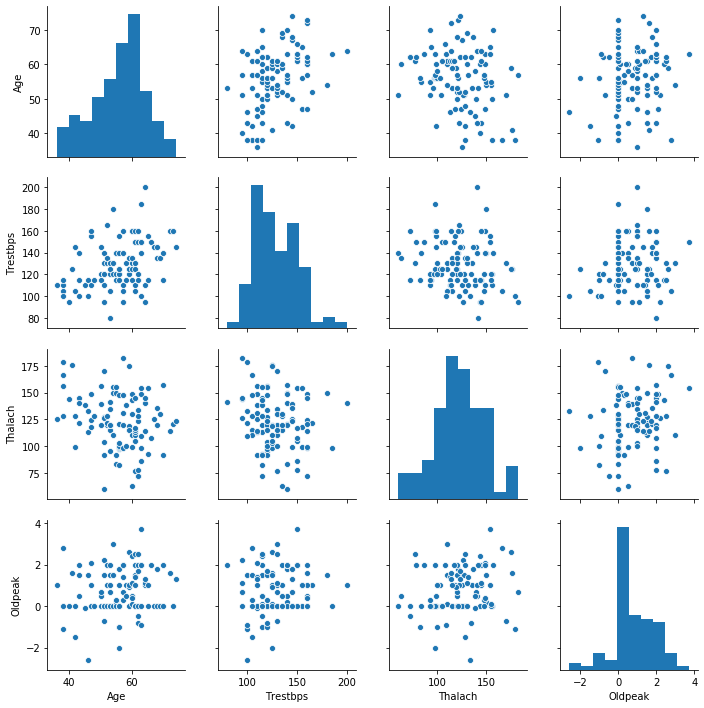

In [47]:
# scatter matrix in Seaborn
sns.pairplot(HD)

In [48]:
#Grouping by Age and finding the target percentage affected and not affected
lst = [HD_new]
for column in lst:
    column.loc[column["Age"] < 30,  'Age_group'] = 20
    column.loc[(column["Age"] >= 30) & (column["Age"] <= 39), 'Age_group'] = 30
    column.loc[(column["Age"] >= 40) & (column["Age"] <= 49), 'Age_group'] = 40
    column.loc[(column["Age"] >= 50) & (column["Age"] <= 59), 'Age_group'] = 50
    column.loc[column["Age"] >= 60, 'Age_group'] = 60

In [49]:
count_age_response_pct = pd.crosstab(HD_new['Target'], HD_new['Age_group']).apply(lambda x: x/x.sum() * 100)
count_age_response_pct = count_age_response_pct.transpose() 


Age = pd.DataFrame(HD_new['Age_group'].value_counts())
Age['% Not Affected'] = Age['Age_group']*100/Age['Age_group'].sum()
Age['% Affected'] = count_age_response_pct[1]
Age.drop('Age_group',axis = 1,inplace = True)
Age.fillna(0)
Age['Age'] = [30,40,50,60]
Age = Age.sort_values('Age',ascending = True)

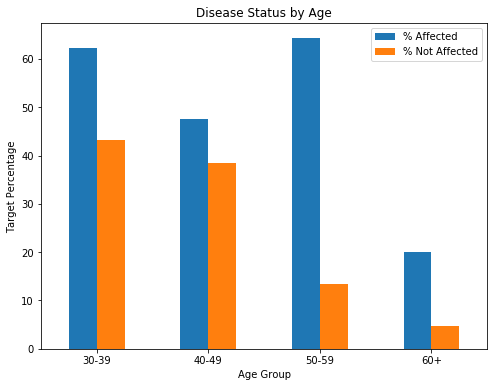

In [50]:
# Plot the results
plot_age = Age[['% Affected','% Not Affected']].plot(kind = 'bar', figsize=(8,6))
plt.xlabel('Age Group')
plt.ylabel('Target Percentage')
plt.xticks(np.arange(4), ('30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Disease Status by Age')
plt.show()

Text(0.5, 1.0, 'Diagnosis for Heart Disease based off of Sex')

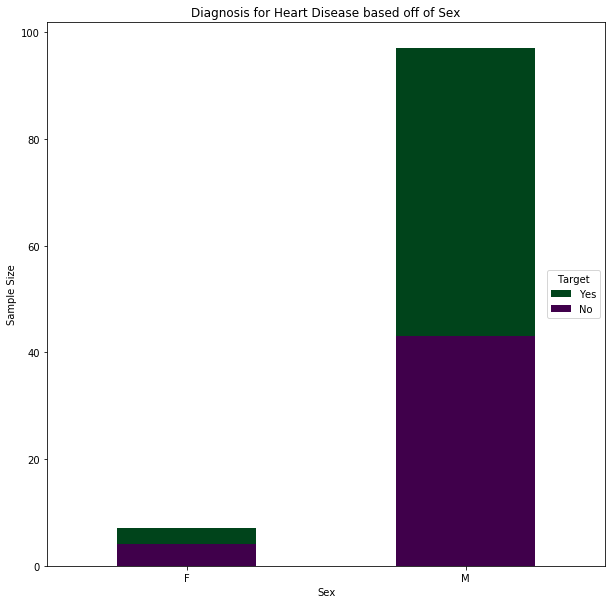

In [51]:
HD_new['Target'][HD_new['Target'] == 0] = 'No'
HD_new['Target'][HD_new['Target'] == 1] = 'Yes'
HD_grouped = HD_new.groupby(['Sex','Target'])['Target'].count()
#To reverse colormap just add (_r) at the end of the color, example: 'PRGn_r'
Graph_1= HD_grouped.unstack().plot(kind='bar',stacked=True, colormap='PRGn', grid=False, figsize=(10,10))
#How to adjust location, title, and direction of legend
handles, labels = Graph_1.get_legend_handles_labels()
Graph_1.legend(reversed(handles), reversed(labels), title='Target', loc='right')
#How to adjust variable's values and rotation'
plt.xticks(np.arange(2), ('F','M'), rotation='horizontal')
#How to include xlabel, ylabel, and title for graph
plt.xlabel('Sex')
plt.ylabel('Sample Size')
plt.title('Diagnosis for Heart Disease based off of Sex')

Text(0, 0.5, 'Attributes')

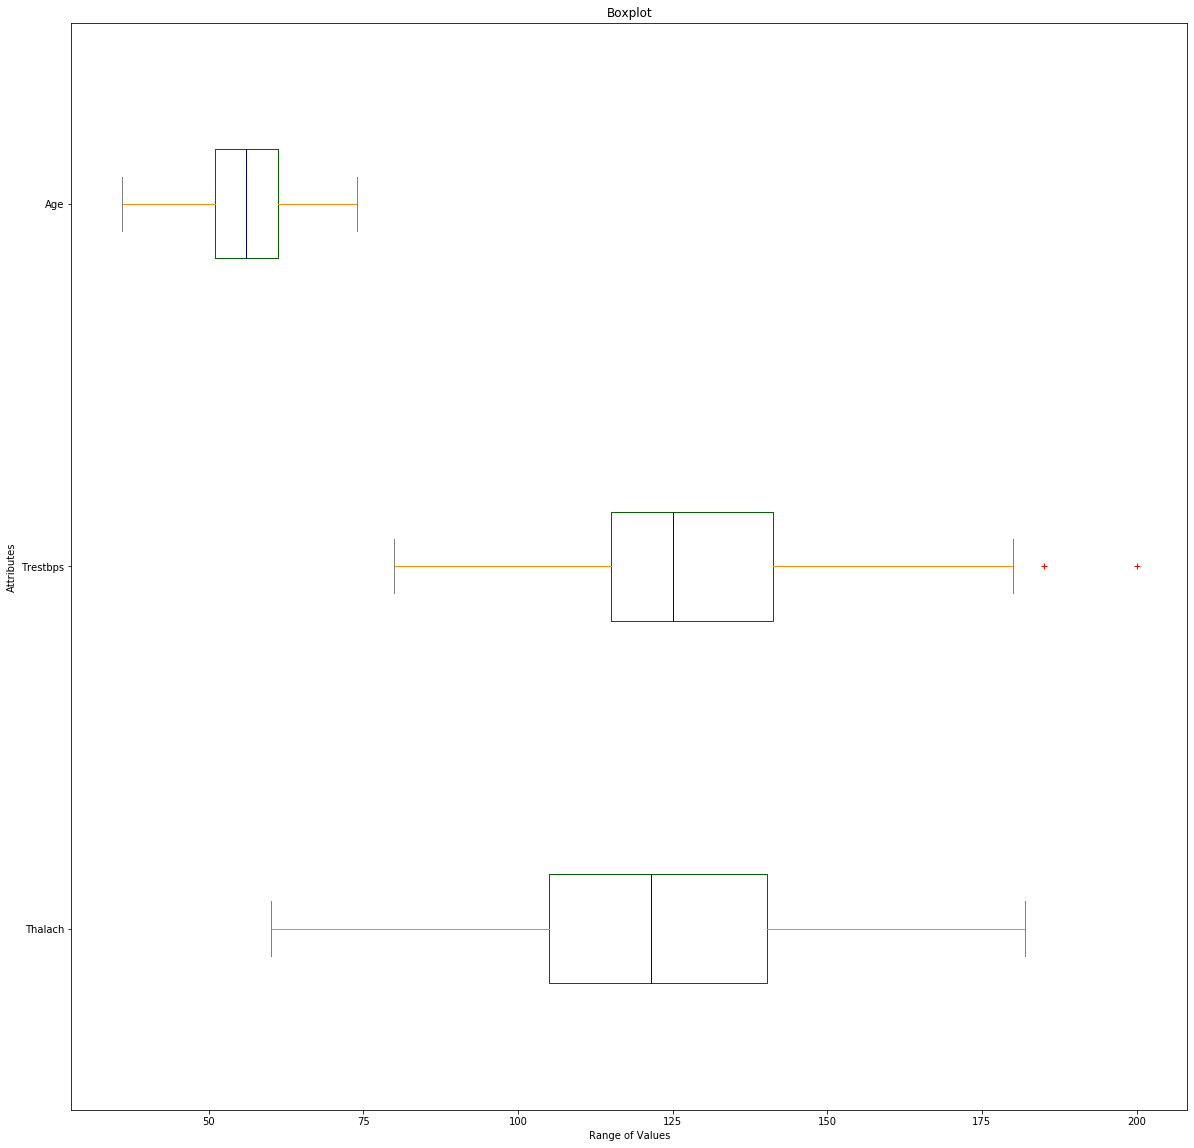

In [52]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkBlue', 'caps': 'Gray'}
HD_new[['Thalach','Trestbps','Age']].plot.box(title='Boxplot', vert=False, color=color, sym='r+', figsize=(20,20))
plt.xlabel('Range of Values')
plt.ylabel('Attributes')

In [53]:
#pip install 'matplotlib==3.1.2' #if ever need to change version

Text(0.5, 1, 'Correlation Between Variables')

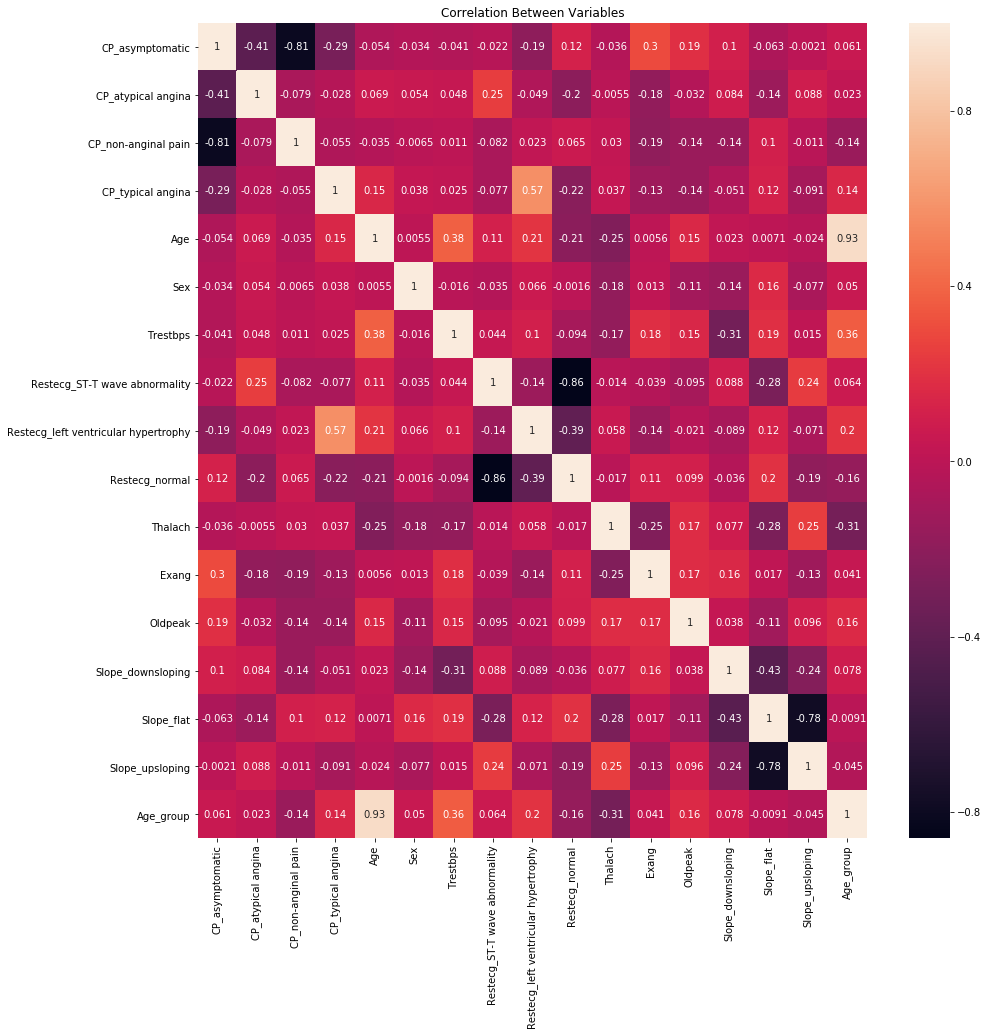

In [54]:
# Genearate heatmap of correlations for the dataset
plt.subplots(figsize=(15,15))
heat_map=sns.heatmap(HD_new.corr(), annot=True, fmt='.2g')
heat_map.set_yticklabels(heat_map.get_yticklabels(), rotation=0)
plt.title('Correlation Between Variables')

In [55]:
HD_new.corr()

,CP_asymptomatic,CP_atypical angina,CP_non-anginal pain,CP_typical angina,Age,Sex,Trestbps,Restecg_ST-T wave abnormality,Restecg_left ventricular hypertrophy,Restecg_normal,Thalach,Exang,Oldpeak,Slope_downsloping,Slope_flat,Slope_upsloping,Age_group
CP_asymptomatic,1.000000,-0.409878,-0.808290,-0.286972,-0.053732,-0.033706,-0.041382,-0.022272,-0.193178,0.120131,-0.036342,0.296018,0.188617,0.099862,-0.062881,-0.002051,0.061096
CP_atypical angina,-0.409878,1.000000,-0.078881,-0.028006,0.068939,0.053727,0.047619,0.246475,-0.049487,-0.203749,-0.005509,-0.181611,-0.032418,0.084270,-0.136678,0.088289,0.023187
CP_non-anginal pain,-0.808290,-0.078881,1.000000,-0.055228,-0.035193,-0.006487,0.010860,-0.082295,0.023236,0.064575,0.030038,-0.188323,-0.141359,-0.142442,0.102312,-0.010660,-0.141095
CP_typical angina,-0.286972,-0.028006,-0.055228,1.000000,0.145126,0.037616,0.025085,-0.076696,0.565916,-0.219923,0.037352,-0.127153,-0.144571,-0.050572,0.117567,-0.091250,0.142860
Age,-0.053732,0.068939,-0.035193,0.145126,1.000000,0.005504,0.377501,0.109182,0.211795,-0.210537,-0.251066,0.005632,0.153261,0.023116,0.007137,-0.023829,0.925839
Sex,-0.033706,0.053727,-0.006487,0.037616,0.005504,1.000000,-0.016447,-0.035033,0.066470,-0.001629,-0.179327,0.012605,-0.105883,-0.143220,0.164101,-0.076638,0.049831
Trestbps,-0.041382,0.047619,0.010860,0.025085,0.377501,-0.016447,1.000000,0.044298,0.102678,-0.094040,-0.172354,0.183171,0.147349,-0.311476,0.188038,0.015111,0.364053
Restecg_ST-T wave abnormality,-0.022272,0.246475,-0.082295,-0.076696,0.109182,-0.035033,0.044298,1.000000,-0.135526,-0.860233,-0.014190,-0.038801,-0.095053,0.087917,-0.281622,0.241790,0.063500
Restecg_left ventricular hypertrophy,-0.193178,-0.049487,0.023236,0.565916,0.211795,0.066470,0.102678,-0.135526,1.000000,-0.388613,0.057912,-0.141822,-0.021216,-0.089363,0.124003,-0.071086,0.202717
Restecg_normal,0.120131,-0.203749,0.064575,-0.219923,-0.210537,-0.001629,-0.094040,-0.860233,-0.388613,1.000000,-0.016608,0.109073,0.099316,-0.035771,0.198085,-0.188275,-0.163382


In [56]:
#Based off of the heatmap, the strongest correlation is Restecg_left ventricular hypertrophy 
#and CP_typical angina which has a correlation coefficient of 0.57

In [57]:
# map each Target to a numerical value
HD_new['Target'] = HD_new.Target.map({'No':0, 'Yes':1})

In [58]:
HD_new.head()

,CP_asymptomatic,CP_atypical angina,CP_non-anginal pain,CP_typical angina,Age,Sex,Trestbps,Restecg_ST-T wave abnormality,Restecg_left ventricular hypertrophy,Restecg_normal,Thalach,Exang,Oldpeak,Slope_downsloping,Slope_flat,Slope_upsloping,Target,Age_group
2,1,0,0,0,36,1,110,0,0,1,125,1,1.0,0,1,0,0,30.0
3,1,0,0,0,38,0,105,0,0,1,166,0,2.8,0,0,1,1,30.0
4,1,0,0,0,38,0,110,0,0,1,156,0,0.0,0,1,0,0,30.0
5,0,0,1,0,38,1,100,0,0,1,179,0,-1.1,0,0,1,0,30.0
6,0,0,1,0,38,1,115,0,0,1,128,1,0.0,0,1,0,0,30.0


In [59]:
HD_new.Target.value_counts()

1    57
0    47
Name: Target, dtype: int64

In [60]:
HD_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2 to 121
Data columns (total 18 columns):
CP_asymptomatic                         104 non-null uint8
CP_atypical angina                      104 non-null uint8
CP_non-anginal pain                     104 non-null uint8
CP_typical angina                       104 non-null uint8
Age                                     104 non-null int64
Sex                                     104 non-null int64
Trestbps                                104 non-null int64
Restecg_ST-T wave abnormality           104 non-null uint8
Restecg_left ventricular hypertrophy    104 non-null uint8
Restecg_normal                          104 non-null uint8
Thalach                                 104 non-null int64
Exang                                   104 non-null int64
Oldpeak                                 104 non-null float64
Slope_downsloping                       104 non-null uint8
Slope_flat                              104 non-null uint8
Slope_up

# Feature and Response Vector (X & Y)

In [61]:
# store feature matrix in "X"
feature_col=['CP_asymptomatic','CP_atypical angina','CP_non-anginal pain','CP_typical angina','Age','Sex','Trestbps','Restecg_ST-T wave abnormality','Restecg_left ventricular hypertrophy','Restecg_normal','Thalach','Exang','Oldpeak','Slope_downsloping','Slope_flat','Slope_upsloping']
X=HD_new[feature_col]

In [62]:
# store response vector in "y"
y=HD_new.Target

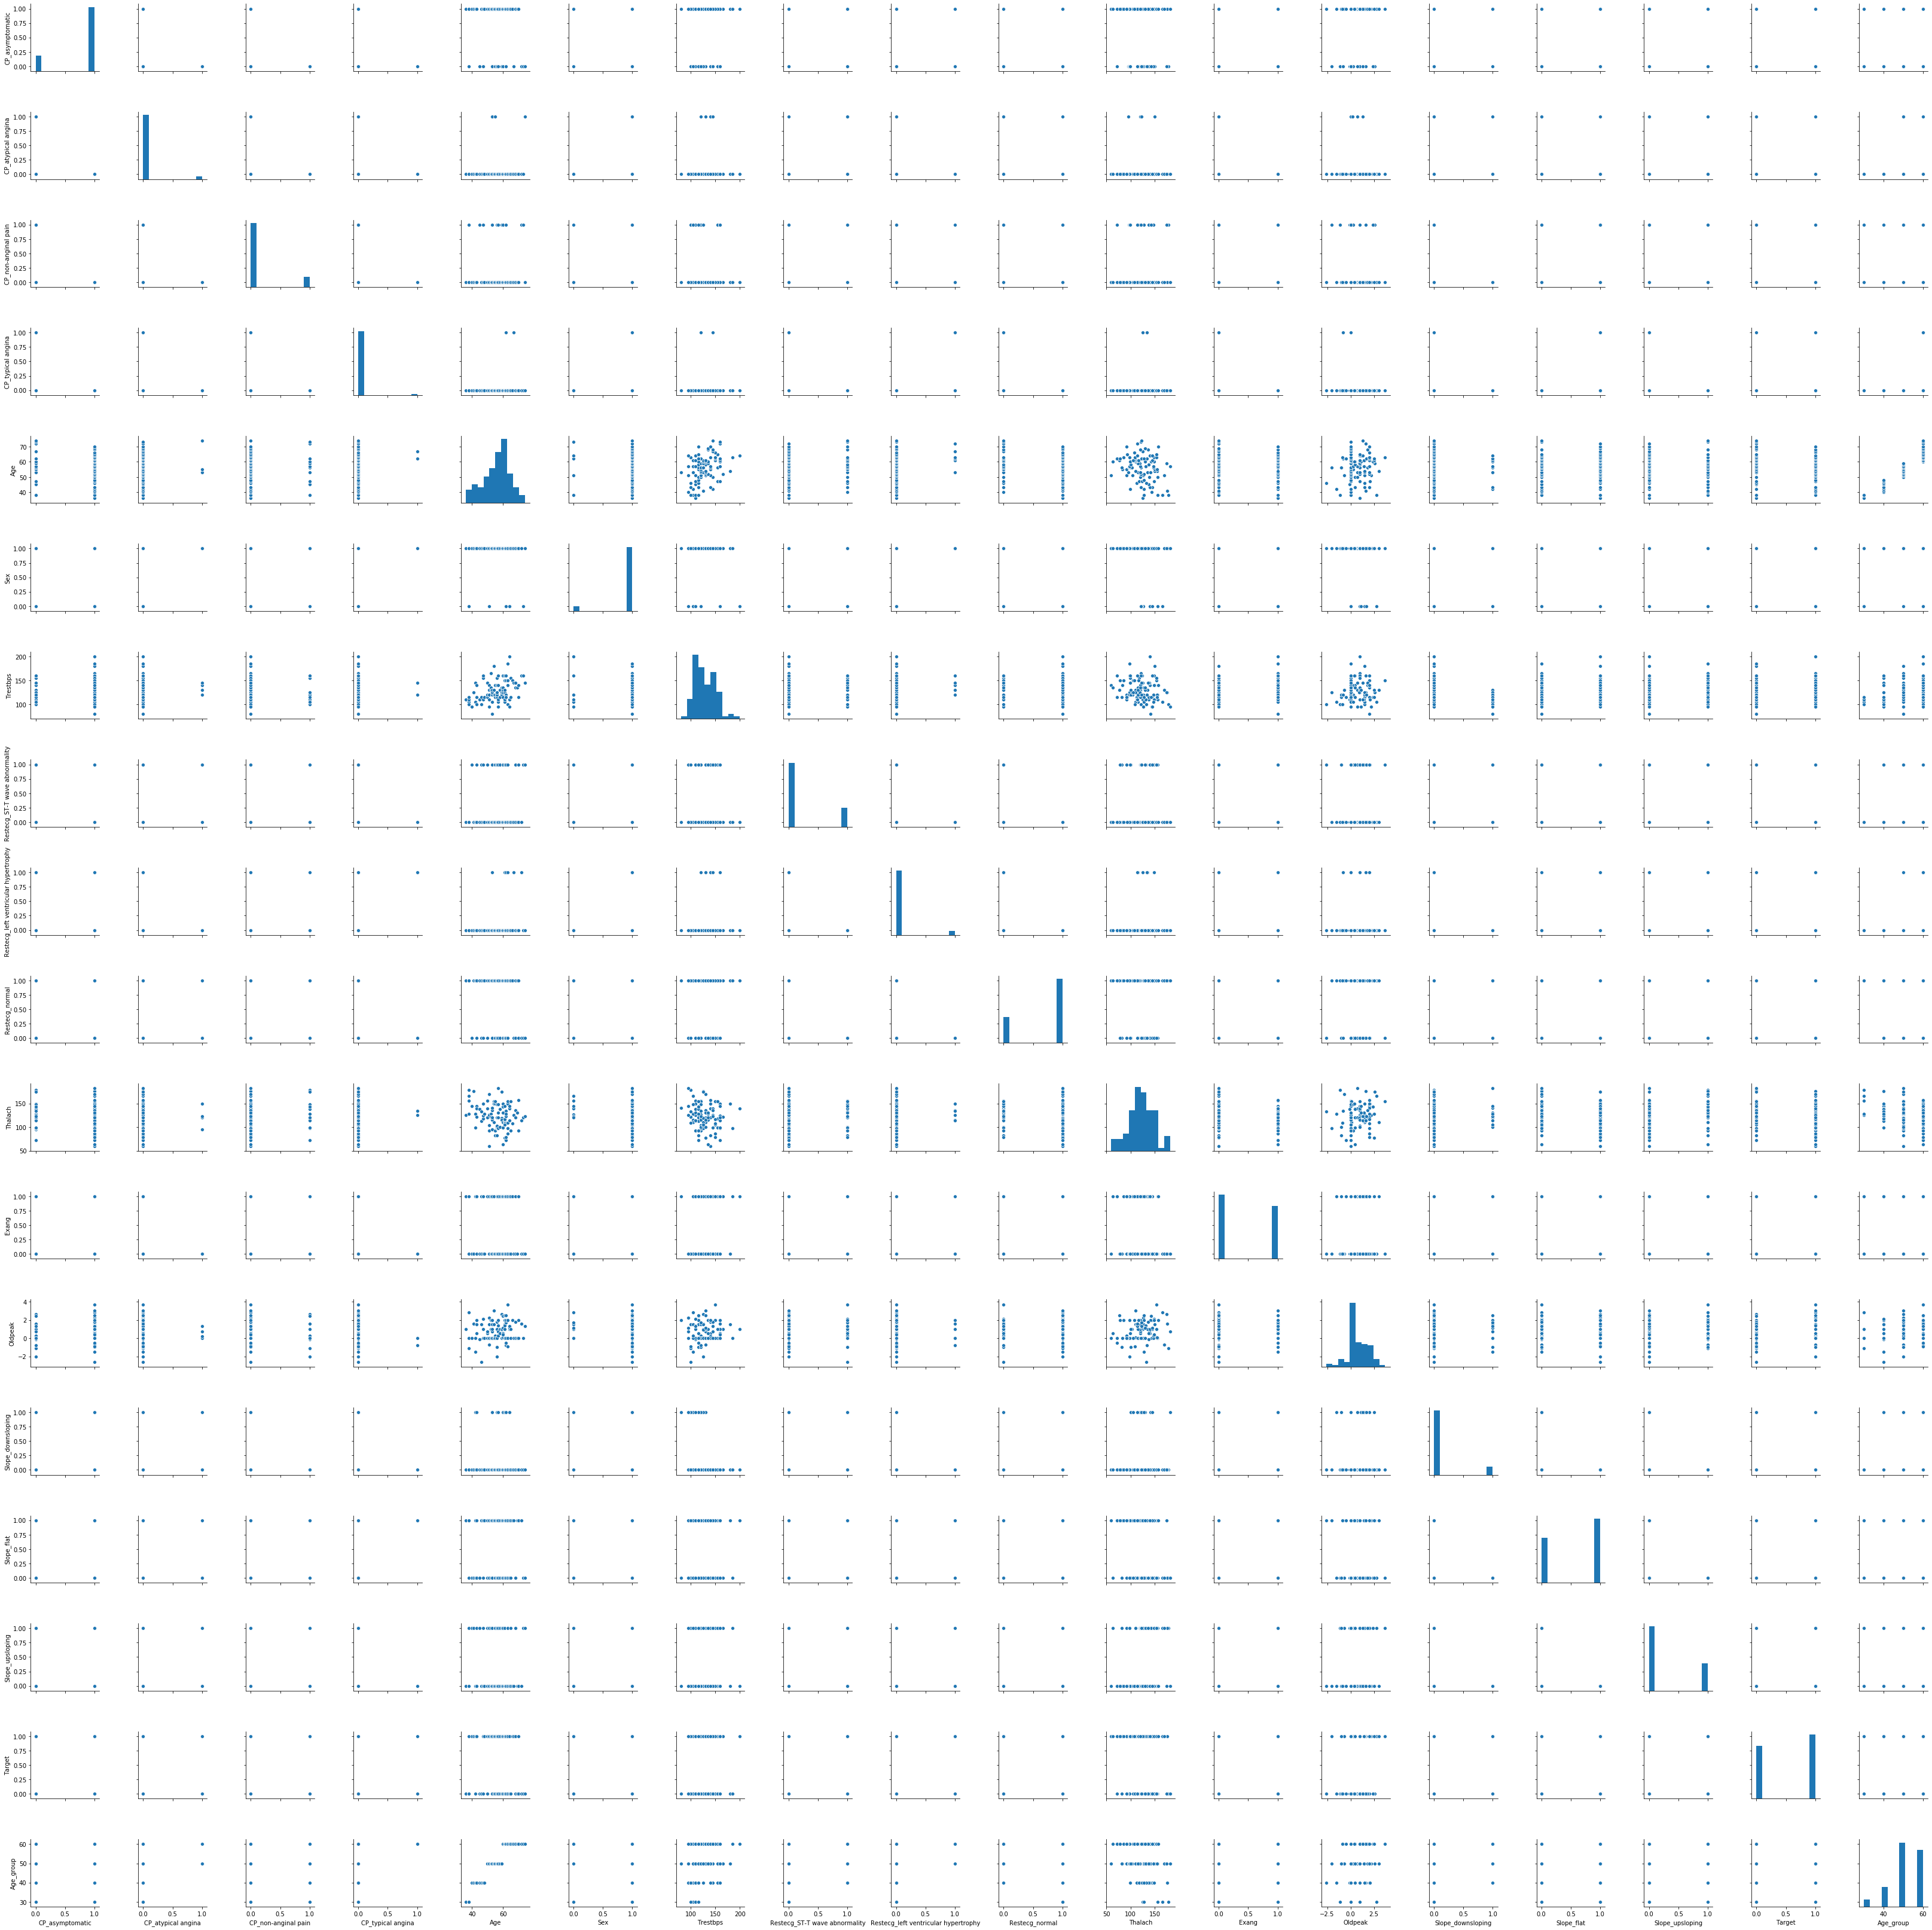

In [63]:
# scatter matrix in Seaborn
sns.pairplot(HD_new)

In [64]:
# create a custom colormap
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

Text(0.5, 1.0, 'Thalach vs. Trestbps')

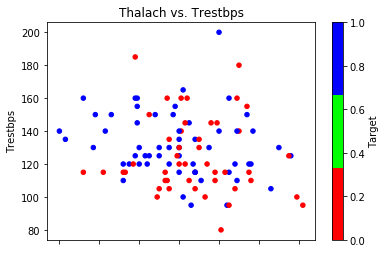

In [65]:
# create a scatter plot of Thalach versus Trestbps and color by Target
HD_new.plot(kind='scatter', x='Thalach', y='Trestbps', c='Target', colormap=cmap_bold)
plt.xlabel('Thalach')
plt.ylabel('Trestbps')
plt.title('Thalach vs. Trestbps')

# Scaling the Data

In [66]:
#Scaling the Dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [67]:
X_scaled

array([[ 0.48795004, -0.2       , -0.39440532, ..., -0.36115756,
         0.83959397, -0.65165753],
       [ 0.48795004, -0.2       , -0.39440532, ..., -0.36115756,
        -1.19105191,  1.53454837],
       [ 0.48795004, -0.2       , -0.39440532, ..., -0.36115756,
         0.83959397, -0.65165753],
       ...,
       [-2.04939015, -0.2       ,  2.53546276, ..., -0.36115756,
         0.83959397, -0.65165753],
       [-2.04939015, -0.2       ,  2.53546276, ..., -0.36115756,
        -1.19105191,  1.53454837],
       [-2.04939015,  5.        , -0.39440532, ..., -0.36115756,
        -1.19105191,  1.53454837]])

# TRAIN_TEST_SPLIT_FUNCTION

In [68]:
#TRAIN_TEST_SPLIT_FUNCTION
# import train_test_split
from sklearn.model_selection import train_test_split

# generate X_train, X_test, y_train, y_test with test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [69]:
# print the shape of X before splitting
print(X.shape)

# print the shape of X_train and X_test after splitting
print(X_train.shape)
print(X_test.shape)

(104, 16)
(72, 16)
(32, 16)


In [70]:
# print the shape of y before splitting
print(y.shape)
# print the shape of y_training and y_testing after splitting
print(y_train.shape)
print(y_test.shape)

(104,)
(72,)
(32,)


In [71]:
X_train

array([[-2.04939015,  5.        , -0.39440532, ...,  2.76887462,
        -1.19105191, -0.65165753],
       [ 0.48795004, -0.2       , -0.39440532, ..., -0.36115756,
         0.83959397, -0.65165753],
       [ 0.48795004, -0.2       , -0.39440532, ..., -0.36115756,
         0.83959397, -0.65165753],
       ...,
       [ 0.48795004, -0.2       , -0.39440532, ...,  2.76887462,
        -1.19105191, -0.65165753],
       [-2.04939015, -0.2       ,  2.53546276, ..., -0.36115756,
        -1.19105191,  1.53454837],
       [ 0.48795004, -0.2       , -0.39440532, ...,  2.76887462,
        -1.19105191, -0.65165753]])

In [72]:
y_train

40    0
81    0
25    1
34    1
74    0
     ..
88    0
13    1
85    1
16    0
46    0
Name: Target, Length: 72, dtype: int64

In [73]:
# Set a random_state parameter value to 100 in train_test_split to split the X,y , test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# print the first element of each object
print (X_train[:1])
print (X_test[:1])
print (y_train[:1])
print (y_test[:1])

    CP_asymptomatic  CP_atypical angina  CP_non-anginal pain  \
60                1                   0                    0   

    CP_typical angina  Age  Sex  Trestbps  Restecg_ST-T wave abnormality  \
60                  0   56    1       125                              0   

    Restecg_left ventricular hypertrophy  Restecg_normal  Thalach  Exang  \
60                                     0               1      103      1   

    Oldpeak  Slope_downsloping  Slope_flat  Slope_upsloping  
60      1.0                  0           1                0  
    CP_asymptomatic  CP_atypical angina  CP_non-anginal pain  \
81                1                   0                    0   

    CP_typical angina  Age  Sex  Trestbps  Restecg_ST-T wave abnormality  \
81                  0   60    1       160                              0   

    Restecg_left ventricular hypertrophy  Restecg_normal  Thalach  Exang  \
81                                     0               1      149      0   

    Ol

# LOGISTIC REGRESSION

In [74]:
# LOGISTIC REGRESSION:
# fit a linear regression model and store the class predictions
logreg = LogisticRegression(C=10, random_state=1)
logreg.fit(X_train, y_train)
assorted_pred_class = logreg.predict(X_test)

In [75]:
HD_new.shape

(104, 18)

In [76]:
Graph_pred = logreg.predict(X)

In [77]:
# add predicted class to DataFrame
HD_new['Graph_pred'] = Graph_pred

In [78]:
Graph_prob = logreg.predict_proba(X)[:, 1]

In [79]:
# add prob class to DataFrame
HD_new['Graph_prob'] = sorted(Graph_prob)

In [80]:
HD_new.head()

,CP_asymptomatic,CP_atypical angina,CP_non-anginal pain,CP_typical angina,Age,Sex,Trestbps,Restecg_ST-T wave abnormality,Restecg_left ventricular hypertrophy,Restecg_normal,Thalach,Exang,Oldpeak,Slope_downsloping,Slope_flat,Slope_upsloping,Target,Age_group,Graph_pred,Graph_prob
2,1,0,0,0,36,1,110,0,0,1,125,1,1.0,0,1,0,0,30.0,1,0.030108
3,1,0,0,0,38,0,105,0,0,1,166,0,2.8,0,0,1,1,30.0,0,0.041511
4,1,0,0,0,38,0,110,0,0,1,156,0,0.0,0,1,0,0,30.0,0,0.043347
5,0,0,1,0,38,1,100,0,0,1,179,0,-1.1,0,0,1,0,30.0,0,0.074279
6,0,0,1,0,38,1,115,0,0,1,128,1,0.0,0,1,0,0,30.0,0,0.079844


In [81]:
logreg.predict_proba(X_test)

array([[0.43725883, 0.56274117],
       [0.92572131, 0.07427869],
       [0.32326461, 0.67673539],
       [0.4228748 , 0.5771252 ],
       [0.8599801 , 0.1400199 ],
       [0.19395536, 0.80604464],
       [0.41681142, 0.58318858],
       [0.81057507, 0.18942493],
       [0.95848871, 0.04151129],
       [0.62137035, 0.37862965],
       [0.06918111, 0.93081889],
       [0.60925555, 0.39074445],
       [0.79414222, 0.20585778],
       [0.34557248, 0.65442752],
       [0.73615149, 0.26384851],
       [0.25621477, 0.74378523],
       [0.17779015, 0.82220985],
       [0.80617288, 0.19382712],
       [0.51532598, 0.48467402],
       [0.47322625, 0.52677375],
       [0.25018166, 0.74981834],
       [0.34734502, 0.65265498],
       [0.64480861, 0.35519139],
       [0.16032857, 0.83967143],
       [0.44586142, 0.55413858],
       [0.47058182, 0.52941818],
       [0.67734359, 0.32265641],
       [0.8277482 , 0.1722518 ],
       [0.28013919, 0.71986081],
       [0.49547241, 0.50452759],
       [0.

In [82]:
# store the predicted probabilites of class 1
assorted_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [83]:
assorted_pred_prob

array([0.56274117, 0.07427869, 0.67673539, 0.5771252 , 0.1400199 ,
       0.80604464, 0.58318858, 0.18942493, 0.04151129, 0.37862965,
       0.93081889, 0.39074445, 0.20585778, 0.65442752, 0.26384851,
       0.74378523, 0.82220985, 0.19382712, 0.48467402, 0.52677375,
       0.74981834, 0.65265498, 0.35519139, 0.83967143, 0.55413858,
       0.52941818, 0.32265641, 0.1722518 , 0.71986081, 0.50452759,
       0.37081897, 0.21934677])

Text(0.5, 1.0, 'Probability of Heart Disease based on Age')

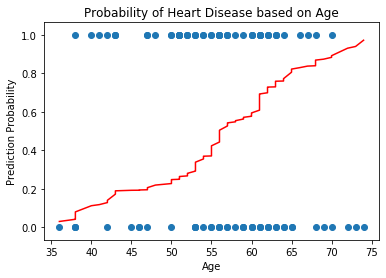

In [84]:
# plot the predicted probabilities
plt.scatter(HD_new.Age, HD_new.Target)
plt.plot(HD_new.Age, HD_new.Graph_prob, color='red')
plt.xlabel('Age')
plt.ylabel('Prediction Probability')
plt.title('Probability of Heart Disease based on Age')

In [85]:
# examine some example predictions
print (logreg.predict(X_test))

[1 0 1 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0]


In [86]:
# examine some example predictions
print (logreg.predict_proba(X_test))

[[0.43725883 0.56274117]
 [0.92572131 0.07427869]
 [0.32326461 0.67673539]
 [0.4228748  0.5771252 ]
 [0.8599801  0.1400199 ]
 [0.19395536 0.80604464]
 [0.41681142 0.58318858]
 [0.81057507 0.18942493]
 [0.95848871 0.04151129]
 [0.62137035 0.37862965]
 [0.06918111 0.93081889]
 [0.60925555 0.39074445]
 [0.79414222 0.20585778]
 [0.34557248 0.65442752]
 [0.73615149 0.26384851]
 [0.25621477 0.74378523]
 [0.17779015 0.82220985]
 [0.80617288 0.19382712]
 [0.51532598 0.48467402]
 [0.47322625 0.52677375]
 [0.25018166 0.74981834]
 [0.34734502 0.65265498]
 [0.64480861 0.35519139]
 [0.16032857 0.83967143]
 [0.44586142 0.55413858]
 [0.47058182 0.52941818]
 [0.67734359 0.32265641]
 [0.8277482  0.1722518 ]
 [0.28013919 0.71986081]
 [0.49547241 0.50452759]
 [0.62918103 0.37081897]
 [0.78065323 0.21934677]]


In [87]:
assorted_pred_class_train = logreg.predict(X_train)

In [88]:
print("Training Accuracy:     ", accuracy_score(y_train, assorted_pred_class_train))

Training Accuracy:      0.7222222222222222


In [89]:
print("Testing Accuracy:     ", accuracy_score(y_test, assorted_pred_class))

Testing Accuracy:      0.65625


# USING THE TRAIN/TEST SPLIT PROCEDURE
### START WITH K=15

In [90]:
#KNN (K=15)
# instantiate the model with K = 15
knn = KNeighborsClassifier(n_neighbors=15)

# train the model on the entire dataset
print (knn)

#Print Trend Line
knn.fit(X_train, y_train)

# predict the response values for the observations in X ("test the model")
import numpy as np
knn.predict(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

In [91]:
# store the predicted response values
y_pred = knn.predict(X_test)

In [92]:
# compute classification accuracy
from sklearn import metrics
print(((metrics.accuracy_score)(y_test,y_pred)))

0.46875


In [93]:
#REPEATED STEPS FOR K=30
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.5


In [94]:
#REPEATED STEPS FOR K=50
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.5625


# SEARCH FOR THE BEST VALUE OF K

In [95]:
#SEARCH FOR THE BEST VALUE OF K
k_range = range(1, 51)
training_error = []
testing_error = []

# write for loop to compute training and testing error for each k and append the results into 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    
# training error
    knn.fit(X, y)
    y_pred = knn.predict(X)
    training_error.append(1 - metrics.accuracy_score(y, y_pred))
# testing error
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    testing_error.append(1 - metrics.accuracy_score(y_test, y_pred))

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Text(0, 0.5, 'Testing Error')

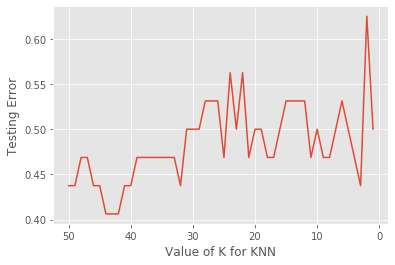

In [97]:
# plot the relationship between K (HIGH TO LOW) and TESTING ERROR
plt.plot(k_range, testing_error)
plt.gca().invert_xaxis()
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Error')

In [98]:
# which K should we use in the model? 

import numpy as np 
np.where(testing_error == min(testing_error))

(array([41, 42, 43]),)

In [99]:
#K=42
knn = KNeighborsClassifier(n_neighbors=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.59375


In [100]:
#K=43
knn = KNeighborsClassifier(n_neighbors=43)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print (metrics.accuracy_score(y_test, y_pred))

0.59375


In [101]:
#A value of K of 42 or 43 is likely the best value for K when using KNN on the Heart Disease dataset 
#for Switzerland. When given these measurements, we can safely estimate the measurements about 59% of the time.

# CROSS-VALIDATION 

In [102]:
#CROSS-VALIDATION 
# import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# perform 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print (scores)

[0.63636364 0.45454545 0.63636364 0.09090909 0.72727273 0.81818182
 0.72727273 0.66666667 0.44444444 0.33333333]


In [103]:
# use average accuracy as an estimate of out-of-sample accuracy
print (scores.mean())

0.5535353535353535


In [104]:
# search for an optimal value of K for KNN with k from 1 to 50
k_range = range(1, 51)
k_scores = []
k_score_items = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_score_items.append(scores)
    k_scores.append(scores.mean())
print (k_scores)

[0.5646464646464647, 0.5414141414141415, 0.5848484848484848, 0.6121212121212122, 0.5535353535353535, 0.5666666666666667, 0.5777777777777777, 0.5666666666666667, 0.5535353535353535, 0.5535353535353535, 0.508080808080808, 0.5282828282828282, 0.5080808080808081, 0.5464646464646465, 0.5393939393939394, 0.6070707070707071, 0.5282828282828282, 0.5282828282828282, 0.4787878787878787, 0.4949494949494949, 0.5373737373737373, 0.5131313131313131, 0.5060606060606061, 0.5262626262626263, 0.4585858585858585, 0.45858585858585854, 0.4626262626262626, 0.4808080808080808, 0.501010101010101, 0.5101010101010102, 0.514141414141414, 0.5303030303030303, 0.5393939393939393, 0.5232323232323233, 0.5212121212121212, 0.5393939393939393, 0.5303030303030303, 0.5373737373737374, 0.5757575757575758, 0.5717171717171718, 0.5444444444444445, 0.5555555555555556, 0.5555555555555556, 0.6212121212121213, 0.5828282828282829, 0.601010101010101, 0.6121212121212121, 0.5737373737373738, 0.6161616161616161, 0.6272727272727272]


In [105]:
print(scores.mean())

0.6272727272727272


In [106]:
import numpy as np 
np.where(testing_error == min(testing_error))

(array([41, 42, 43]),)

Text(0, 0.5, 'Cross-Validated Accuracy')

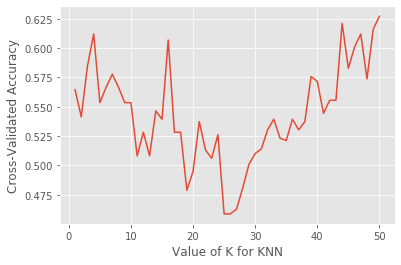

In [107]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
import matplotlib.pyplot as plt
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [108]:
#A value of K of 42 or 43 is likely the best value for K when using KNN on the Heart Disease dataset 
#for Switzerland. When given these measurements, we can safely estimate the measurements about 59% of the time.

# MEAN SQUARED ERROR

In [109]:
#MEAN SQUARED ERROR
# Two different ways to check model performance/accuracy using,
# mean squared error which tells you how close a regression line is to a set of points.

# 1. Mean squared error by numpy
print (metrics.mean_squared_error(y_test, y_pred))

# 2. Mean squared error by sklearn 

from sklearn.metrics import mean_squared_error
test_error=mean_squared_error(y_test, y_pred)
print('test data MSE')
print(test_error)

0.40625
test data MSE
0.40625


# Hyperparameter Tuning and k-fold Cross-Validation for Logistic Regression model

In [110]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

logistic = LogisticRegression()

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_logistic_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Best Penalty:', best_logistic_model.best_estimator_)

# Predict target vector
y_pred = best_logistic_model.predict(X_test)

# Compute the accuracy, precision, recall of the test dataset prediction
print (accuracy_score(y_test,y_pred))
print (precision_score(y_test,y_pred))
print (recall_score(y_test,y_pred))


# roc computation 
# predict probabilities
from sklearn.metrics import roc_auc_score
lr_probs = best_logistic_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print(' ROC AUC=%.3f' % (lr_auc))

Best Penalty: LogisticRegression(C=1291.5496650148827, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.65625
0.8666666666666667
0.5909090909090909
 ROC AUC=0.750


/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


# KNN(k-Nearest Neighbors)

In [111]:
KNeighborsClassifier()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [112]:
'''n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1'''

"n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=1"

In [113]:
#New Method of GridSearch
n_neighbors = range(2,10)
leaf_size = range(2,5)
n_jobs = range(1,2)

#Create hyperparameter options
hyperparameters = dict(n_neighbors = n_neighbors, leaf_size = leaf_size, n_jobs = n_jobs)

knn = KNeighborsClassifier()
clf = GridSearchCV(knn, hyperparameters, cv=5, verbose=0)

best_knn = clf.fit(X_train, y_train)
best_knn.predict(X_test)

/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [114]:
#Old Method of GridSearch
for k in range(2,10):
    for p in range(2,10):
        for n_j in range(1,10):
            knn = KNeighborsClassifier(n_neighbors=k,p=p,n_jobs = n_j)
            print(k,p, n_j)

2 2 1
2 2 2
2 2 3
2 2 4
2 2 5
2 2 6
2 2 7
2 2 8
2 2 9
2 3 1
2 3 2
2 3 3
2 3 4
2 3 5
2 3 6
2 3 7
2 3 8
2 3 9
2 4 1
2 4 2
2 4 3
2 4 4
2 4 5
2 4 6
2 4 7
2 4 8
2 4 9
2 5 1
2 5 2
2 5 3
2 5 4
2 5 5
2 5 6
2 5 7
2 5 8
2 5 9
2 6 1
2 6 2
2 6 3
2 6 4
2 6 5
2 6 6
2 6 7
2 6 8
2 6 9
2 7 1
2 7 2
2 7 3
2 7 4
2 7 5
2 7 6
2 7 7
2 7 8
2 7 9
2 8 1
2 8 2
2 8 3
2 8 4
2 8 5
2 8 6
2 8 7
2 8 8
2 8 9
2 9 1
2 9 2
2 9 3
2 9 4
2 9 5
2 9 6
2 9 7
2 9 8
2 9 9
3 2 1
3 2 2
3 2 3
3 2 4
3 2 5
3 2 6
3 2 7
3 2 8
3 2 9
3 3 1
3 3 2
3 3 3
3 3 4
3 3 5
3 3 6
3 3 7
3 3 8
3 3 9
3 4 1
3 4 2
3 4 3
3 4 4
3 4 5
3 4 6
3 4 7
3 4 8
3 4 9
3 5 1
3 5 2
3 5 3
3 5 4
3 5 5
3 5 6
3 5 7
3 5 8
3 5 9
3 6 1
3 6 2
3 6 3
3 6 4
3 6 5
3 6 6
3 6 7
3 6 8
3 6 9
3 7 1
3 7 2
3 7 3
3 7 4
3 7 5
3 7 6
3 7 7
3 7 8
3 7 9
3 8 1
3 8 2
3 8 3
3 8 4
3 8 5
3 8 6
3 8 7
3 8 8
3 8 9
3 9 1
3 9 2
3 9 3
3 9 4
3 9 5
3 9 6
3 9 7
3 9 8
3 9 9
4 2 1
4 2 2
4 2 3
4 2 4
4 2 5
4 2 6
4 2 7
4 2 8
4 2 9
4 3 1
4 3 2
4 3 3
4 3 4
4 3 5
4 3 6
4 3 7
4 3 8
4 3 9
4 4 1
4 4 2
4 4 3
4 4 4
4 4 

# Random Forest Classifier

In [115]:
# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=50, random_state=1)

# Fit on training data
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [116]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [117]:
#!pip install graphviz

In [118]:
#!pip install pydot

In [119]:
#!apk add --update --no-cache graphviz

In [120]:
#!path>brew install graphviz

In [121]:
#!sudo apt install graphviz

In [122]:
#!sudo chown -R aulon:aulon ~/.local/share/jupyter

In [123]:
#Decision Tree (Not working)
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot','-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

#Display in Jupyter Notebook
from IPython.display import Image
Image(filename = 'tree.png')

FileNotFoundError: [Errno 2] No such file or directory: 'dot': 'dot'

In [124]:
# Actual class predictions
y_test_predictions = model.predict(X_test)
print(y_test_predictions)
# Probabilities for each class
y_test_probs = model.predict_proba(X_test)[:, 1]
print(y_test_probs)

[0 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1]
[0.3  0.42 0.54 0.56 0.66 0.3  0.64 0.74 0.26 0.32 0.84 0.4  0.46 0.58
 0.56 0.82 0.76 0.26 0.6  0.44 0.6  0.56 0.5  0.76 0.72 0.44 0.34 0.46
 0.46 0.46 0.2  0.58]


In [125]:
import numpy as np
n_nodes = []
max_depths = []

# Stats about the trees in random forest
for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 43
Average maximum depth 9


In [126]:
y_train.shape

(72,)

In [127]:
np.array(y_train).reshape(-1,1)

array([[1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1]])

In [128]:
X_train.shape

(72, 16)

In [129]:
X_test.shape

(32, 16)

In [130]:
# Training predictions (to demonstrate overfitting)
y_train_predictions = model.predict(X_train)
y_train_probs = model.predict_proba(X_train)

# Testing predictions (to determine performance)
y_test_predictions = model.predict(X_test)
y_test_probs = model.predict_proba(X_test)

In [131]:
(y_test_predictions == y_test).sum()

18

In [132]:
y_test

81     0
67     0
44     1
27     0
31     1
90     1
45     1
46     0
104    0
63     1
33     1
94     1
85     1
35     1
74     0
36     1
80     1
41     0
88     0
9      1
52     1
15     1
95     1
100    1
99     1
40     0
108    0
28     1
29     1
59     1
103    1
26     1
Name: Target, dtype: int64

In [133]:
y_test_probs.shape

(32, 2)

In [134]:
y_test_positive=y_test_probs[:,1]

In [135]:
y_test_positive.shape

(32,)

In [136]:
y_train_probs.shape

(72, 2)

In [137]:
y_train_positive=y_train_probs[:,1]

In [138]:
y_train_positive.shape

(72,)

# Receiver Operating Characteristic (ROC) Curve

Recall Baseline: 1.0 Test: 0.55 Train: 0.55
Precision Baseline: 0.69 Test: 0.75 Train: 0.75
Roc Baseline: 0.5 Test: 0.68 Train: 0.68


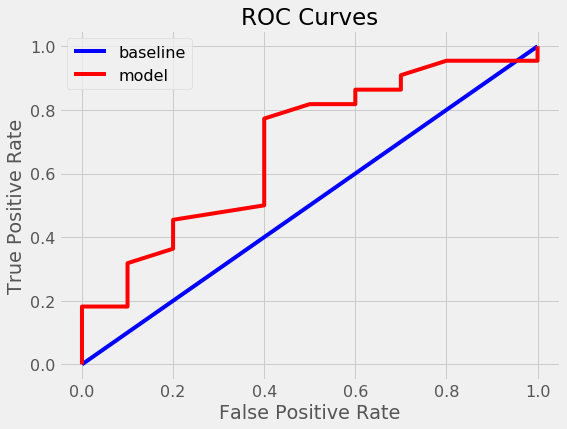

<Figure size 432x288 with 0 Axes>

In [139]:
# Plot formatting
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 18
def evaluate_model(y_test_predictions, y_test_probs, y_train_predictions, y_train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(y_test, 
                                     [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, 
                                      [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(y_test, y_test_predictions)
    results['precision'] = precision_score(y_test, y_test_predictions)
    results['roc'] = roc_auc_score(y_test, y_test_positive)
    
    train_results = {}
    train_results['recall'] = recall_score(y_train, y_train_predictions)
    train_results['precision'] = precision_score(y_train, y_train_predictions)
    train_results['roc'] = roc_auc_score(y_train, y_train_positive)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, y_test_positive)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); 
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(y_test_predictions, y_test_probs, y_train_predictions, y_train_probs)
plt.savefig('roc_auc_curve.png')

In [140]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_positive)

In [141]:
auc(fpr, tpr)

0.6795454545454546

In [142]:
# 0.90 - 1.00 = excellent
# 0.80 - 0.90 = good
# 0.70 - 0.80 = fair
# 0.60 - 0.70 = poor
# 0.50 - 0.60 = fail

# Result: The performance of this model is poor with a value of 0.68

In [143]:
RF= RandomForestClassifier()

In [144]:
#New Method of GridSearch
n_estimators = [100,200,300]
max_depth = range(2,5)


#Create hyperparameter options
hyperparameters = dict(n_estimators = n_estimators, max_depth = max_depth)

RF = RandomForestClassifier()
clf = GridSearchCV(RF, hyperparameters, cv=5, verbose=0)

best_RF = clf.fit(X_train, y_train)
best_RF.predict(X_test)

/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

# Confusion Matrix

In [145]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

In [146]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
confusion_matrix

array([[ 6,  4],
       [10, 12]])

In [147]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.375
Specificity :  0.75


# Gradient Boosting Classifier

In [148]:
GBC = GradientBoostingClassifier()

In [149]:
#New Method of GridSearch
n_estimators = [100,200,300]
max_depth = range(2,5)


#Create hyperparameter options
hyperparameters = dict(n_estimators = n_estimators, max_depth = max_depth)

GBC = GradientBoostingClassifier()
clf = GridSearchCV(GBC, hyperparameters, cv=5, verbose=0)

best_GBC = clf.fit(X_train, y_train)
best_GBC.predict(X_test)

/Users/jetta47/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


array([0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1])